

# : Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



Introduction
Data Set: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

ScheduledDay tells us on what day the patient set up their appointment.

Neighborhood indicates the location of the hospital.

Age = How old is the patient.

Hipertension = True or False

Diabetes= True or False

Alcoholism = True or False

Handcap = True or False

SMS_received = 1 or more messages sent to the patient.

No-show = True or False.

Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

‘Bolsa Família’ It is a social welfare program of the Brazilian government, part of the Fome Zero network of federal assistance programs. Bolsa Família provides financial aid to poor Brazilian families


# The Questions:

1 :: Proportion of Male & Female and Proportion of people show to the appointment. 
2 - what are the most feature that matter the most of ('Age')to make the patient make it to his appiontment?
3 Which disease is most likely to occur according to age groups . 
4 - what are the most feature that matter the most of ('Having an SMS'), to make the patient make it to his appiontment?
5 : Which is the disease most people are suffering from? 
6 : Characteristics of the disease hypertension . 
7 : Characteristics of the disease diabetes . 
8 : Knowing the Proportion of women and men in each level of handicap . 
9 : which neighborhoods have the highest number of shows / no-shows? . 
10 : what are the most feature that matter the most of ( 'Scholarship'), to make the patient make it to his appiontment? ..

In [2]:
#Let us import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [66]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling





In [4]:
#read data from csv file ..... 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [5]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Knowing each data type columns....
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# Some statistics from the dataset 
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

# Data Cleaning

 

# Identify the missing values within the dataset. 

In [10]:
# view missing value count for dataset......
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Identify the dub values within the dataset. 

In [9]:
#Ensure that there are no repetitions for dataset.
df.duplicated().sum()

0

# Includes removing any incorrect data harmful for analysis

In [11]:
# Drop Extraneous Columns
# drop columns from... dataset
df.drop (['PatientId', 'AppointmentID'], axis=1,inplace=True)

print(df.head())

  Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      N

# convert all the column names to lowercase

In [12]:
# lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
print(df.head())

  gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  no-show  
0      No  
1      No  
2      No  
3      N

# correct the columns with spelling mistakes

In [13]:
#correct the columns with spelling mistakes and also for better understanding change 'no-show' column name to 'show'
df.rename({'neighbourhood': 'neighbourhood' , 'hipertension' : 'hypertension', 'no-show':'no_show','handcap' : 'handicap'}, axis = 1, inplace = True)
print(df.head())

  gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  
0      No  
1      No  
2      No  
3 

# Converting scheduled day and appointment day to datetime

In [14]:
### appointmentday & scheduledday both are in int convert them to date .....
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
print(df.head())

  gender        scheduledday appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No  


In [15]:
# Get year, month, day and hour from a column scheduledday......
df['year_scheduledday']= df['scheduledday'].dt.year
df['month_scheduledday']= df['scheduledday'].dt.month
df['day_scheduledday']= df['scheduledday'].dt.day_name()
df['hour_scheduledday']= df['scheduledday'].dt.hour
# Get year, month and day  from a column appointmentday........
df['year_appointmentday']= df['appointmentday'].dt.year
df['month_appointmentday']= df['appointmentday'].dt.month
df['day_appointmentday	']= df['appointmentday'].dt.day_name()
print(df.head())

  gender        scheduledday appointmentday  age      neighbourhood  \
0      F 2016-04-29 18:38:08     2016-04-29   62    JARDIM DA PENHA   
1      M 2016-04-29 16:08:27     2016-04-29   56    JARDIM DA PENHA   
2      F 2016-04-29 16:19:04     2016-04-29   62      MATA DA PRAIA   
3      F 2016-04-29 17:29:31     2016-04-29    8  PONTAL DE CAMBURI   
4      F 2016-04-29 16:07:23     2016-04-29   56    JARDIM DA PENHA   

   scholarship  hypertension  diabetes  alcoholism  handicap  sms_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  no_show  year_scheduledday  month_scheduledday day_scheduledday  \
0      No               2016       

In [16]:
#create new column to store time between schedule and appointment
df['waiting_time_days'] =(df['appointmentday'] - df['scheduledday']).dt.days

In [17]:
#As we have gathered all the data required from both of these columns, drop them
df.drop(labels = ['scheduledday','appointmentday'],axis =1 ,inplace = True)

# Removing Age outliers from the data frame to limit the data in a certain age range

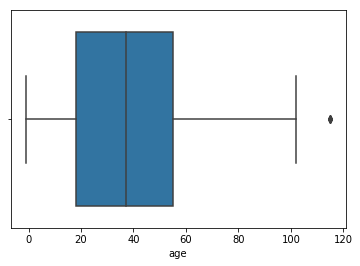

In [18]:
# create a boxplot of the age using seaborn
sns.boxplot(df.age)
plt.show()

In [19]:
# return all entries less than 0 years old.
### Let us check if our dataset contains age group below 0.
print(df[df['age'] < 0])

      gender  age neighbourhood  scholarship  hypertension  diabetes  \
99832      F   -1         ROMÃO            0             0         0   

       alcoholism  handicap  sms_received no_show  year_scheduledday  \
99832           0         0             0      No               2016   

       month_scheduledday day_scheduledday  hour_scheduledday  \
99832                   6           Monday                  8   

       year_appointmentday  month_appointmentday day_appointmentday\t  \
99832                 2016                     6               Monday   

       waiting_time_days  
99832                 -1  


In [20]:
x=99832
# We should drop it
df.drop(index =x ,inplace = True)

In [21]:
# return all entries older than 100
print(df[df.age > 100])

      gender  age neighbourhood  scholarship  hypertension  diabetes  \
58014      F  102     CONQUISTA            0             0         0   
63912      F  115    ANDORINHAS            0             0         0   
63915      F  115    ANDORINHAS            0             0         0   
68127      F  115    ANDORINHAS            0             0         0   
76284      F  115    ANDORINHAS            0             0         0   
90372      F  102   MARIA ORTIZ            0             0         0   
97666      F  115      SÃO JOSÉ            0             1         0   

       alcoholism  handicap  sms_received no_show  year_scheduledday  \
58014           0         0             0      No               2016   
63912           0         1             0     Yes               2016   
63915           0         1             0     Yes               2016   
68127           0         1             0     Yes               2016   
76284           0         1             0      No              

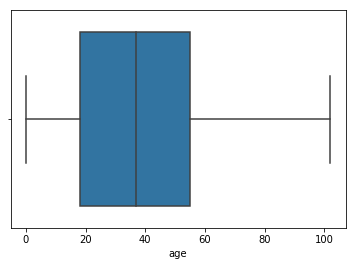

In [22]:
df = df[df['age'] < 115]

# display the boxplot again to verify the outcome
sns.boxplot(df.age)
plt.show()

# Summary

dataset has zero duplicate and null values , convert all the column names to lowercase ,  correct the columns with spelling mistakes
, Removing Age outliers from the data frame to limit the data in a certain age range , create new column to store time between schedule and appointment ...

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :: Proportion of Male & Female and Proportion of people show to the appointment.

In [23]:
#Find out the number of men and women......
df['gender'].value_counts()

F    71834
M    38687
Name: gender, dtype: int64

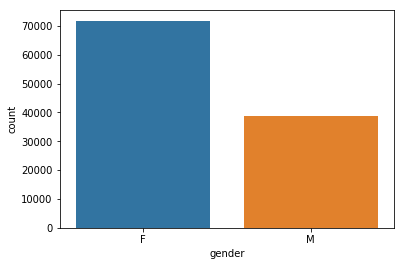

In [24]:
# Create a count plot of gender....
sns.countplot(x='gender',
                data=df,
                )

# Display plot
plt.show()

graph show >>> The number of women is more than the number of men 

In [25]:
df['gender'].value_counts()

F    71834
M    38687
Name: gender, dtype: int64

In [26]:
#Proportion of people show to the appointment.
df['no_show'].value_counts()

No     88205
Yes    22316
Name: no_show, dtype: int64

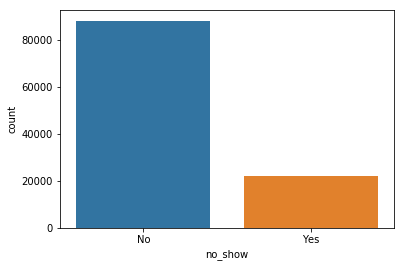

In [27]:
# Create a count plot of gender....
sns.countplot(x='no_show',
                data=df,
                )

# Display plot
plt.show()

graph show >>> More people come on time than those who don't

In [28]:
# Knowing the percentage of women and men who attend and those who do not
df.groupby('gender')['no_show'].value_counts(normalize = True).round(2)
### 80% male & female show on their scheduled appointments

gender  no_show
F       No         0.8
        Yes        0.2
M       No         0.8
        Yes        0.2
Name: no_show, dtype: float64

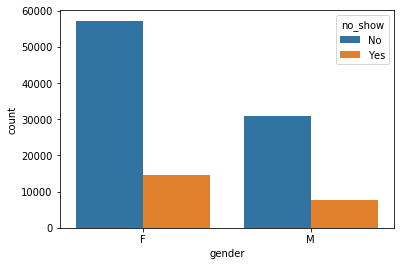

In [29]:
# Find out how many women and men are attending and who are not
sns.countplot(x='gender',
                data=df,
                hue='no_show',
                )

# Display plot
plt.show()

It shows 80% of female comes to the scheduled appointment and 20% doesn't &&
It shows 80% of male comes to the scheduled appointment and 20% doesn't.

### Research Question  2 - what are the most feature that matter the most of ('Age')to make the patient make it to his appiontment?

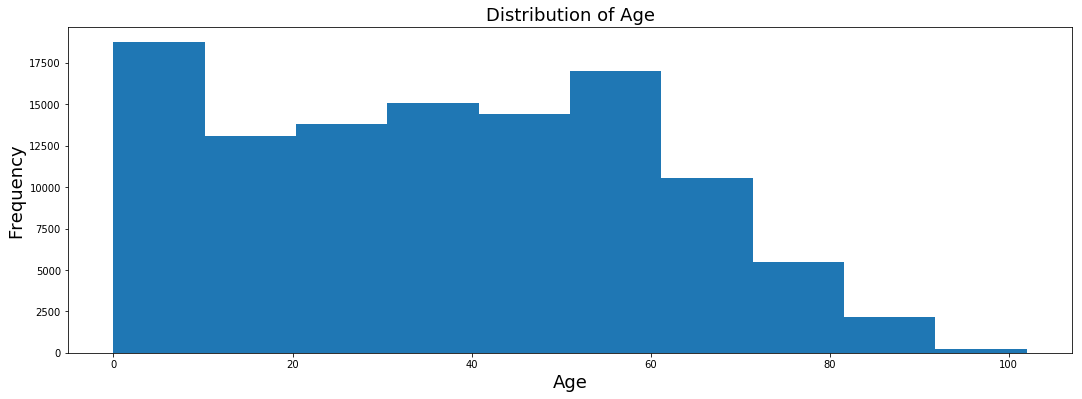

In [30]:
# Show age distribution
plt.figure(figsize = (18,6));
plt.hist(df['age'])
plt.xlabel('Age',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('Distribution of Age',fontsize = 18)
plt.show()

In [31]:
#print the average age of people who show up and people who didn't
df[df['no_show']=='No']['age'].mean()

37.788753472025398

In [32]:
df[df['no_show']=='Yes']['age'].mean()

34.306820218677181

• As we can see in our investigation the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 37.788753472025398 , and the average age for people who are not likely to show up is 34.306820218677181.

# Research Question  3  Which disease is most likely to occur according to age groups

In [33]:
#set four age group
labels = ['child', 'young', 'middle_age', 'senior']
edges = [0,13,30,50,116]
df['age_group']=pd.cut(df['age'], bins = edges, labels = labels,include_lowest = True)

In [34]:
df.groupby('age_group')['no_show'].value_counts(normalize = True)

age_group   no_show
child       No         0.791770
            Yes        0.208230
young       No         0.749702
            Yes        0.250298
middle_age  No         0.792956
            Yes        0.207044
senior      No         0.838387
            Yes        0.161613
Name: no_show, dtype: float64

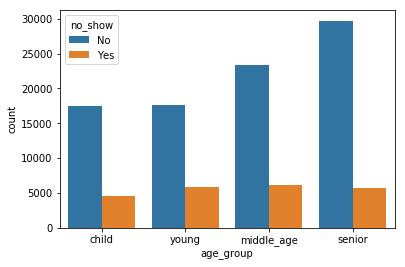

In [35]:
# Create a count plot of no_show....
sns.countplot(x='age_group',
                data=df,
             hue=  'no_show' )

# Display plot
plt.show()

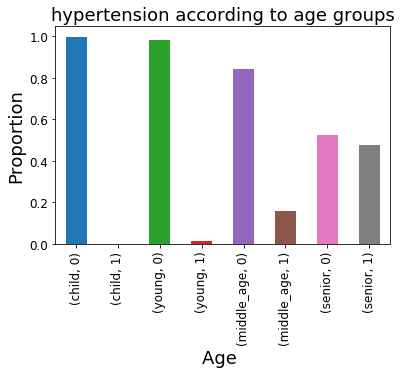

In [36]:
df.groupby('age_group')['hypertension'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 12);
#set labels and title
plt.xlabel('Age ', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('hypertension according to age groups', fontsize = 18);

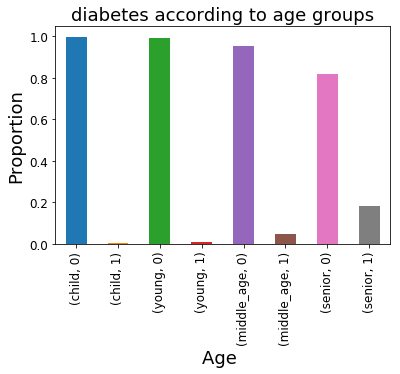

In [37]:
df.groupby('age_group')['diabetes'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 12);
#set labels and title
plt.xlabel('Age ', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('diabetes according to age groups', fontsize = 18);

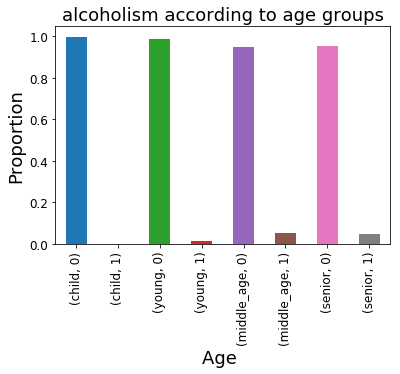

In [38]:
df.groupby('age_group')['alcoholism'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 12);
#set labels and title
plt.xlabel('Age ', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('alcoholism according to age groups', fontsize = 18);

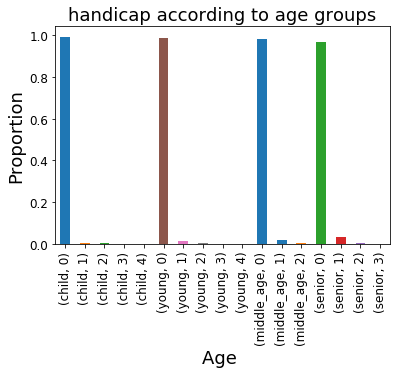

In [39]:
df.groupby('age_group')['handicap'].value_counts(normalize = True).plot(kind = 'bar',fontsize = 12);
#set labels and title
plt.xlabel('Age ', fontsize = 18);
plt.ylabel('Proportion', fontsize = 18);
plt.title('handicap according to age groups', fontsize = 18);

Graph depicts Senior people are having highest proportion of Hypertension,Diabetes followed by Middle age group and as expected child group doesnt seem to have any of the major disease except handicap.

# Research Question  4 -  what are the most feature that matter the most of ('Having an SMS'), to make the patient make it to his appiontment?

In [40]:
#Average No. of people have received the SMS is
df['sms_received'].mean()

0.3210340116357977

In [41]:
df.groupby('sms_received')['no_show'].value_counts(normalize = True)

sms_received  no_show
0             No         0.832996
              Yes        0.167004
1             No         0.724247
              Yes        0.275753
Name: no_show, dtype: float64

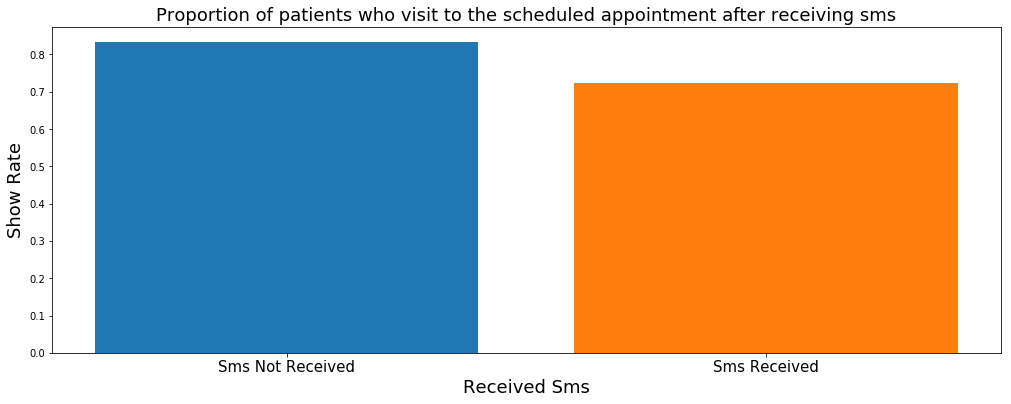

In [42]:
plt.figure(figsize = (17,6))

plt.bar(0,df.groupby('sms_received')['no_show'].value_counts(normalize = True)[0]['No'])
plt.bar(1,df.groupby('sms_received')['no_show'].value_counts(normalize = True)[1]['No'])
location = [0,1]
labels = ['Sms Not Received', 'Sms Received']
plt.xticks(location,labels,fontsize = 15)
plt.xlabel('Received Sms',fontsize = 18)
plt.ylabel('Show Rate',fontsize = 18)
plt.title('Proportion of patients who visit to the scheduled appointment after receiving sms',fontsize = 18);

• As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come

# Research Question 5 :  Which is the disease most people are suffering from?

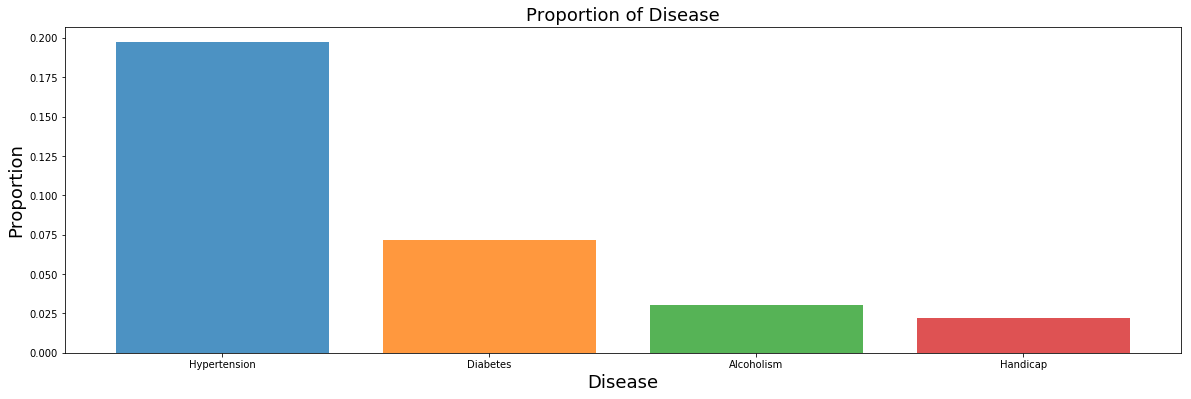

In [43]:
 #set figuresize
plt.figure(figsize = (20,6))
#set bar location and Height
plt.bar(1,df['hypertension'].mean(),alpha=0.8,label = 'Hypertension')
plt.bar(2,df['diabetes'].mean(),alpha=0.8,label = 'Diabetes')
plt.bar(3,df['alcoholism'].mean(),alpha=0.8,label = 'Alcoholism')
plt.bar(4,df['handicap'].mean(),alpha=0.8,label = 'Handicap')
names = ['Hypertension','Diabetes','Alcoholism','Handicap']
x_axis = [1,2,3,4]
#set ticklabels and title
plt.xticks(x_axis,names)
plt.xlabel('Disease',fontsize = 18)
plt.ylabel('Proportion', fontsize = 18)
plt.title('Proportion of Disease',fontsize = 18)
plt.show()
#We can observe Most of the people in our data set are suffering from Hypertension.

We can observe Most of the people in our data set are suffering from Hypertension.

# Research Question 6 : Characteristics of the disease hypertension

In [44]:
df_hypertension=df[df['hypertension']==1]

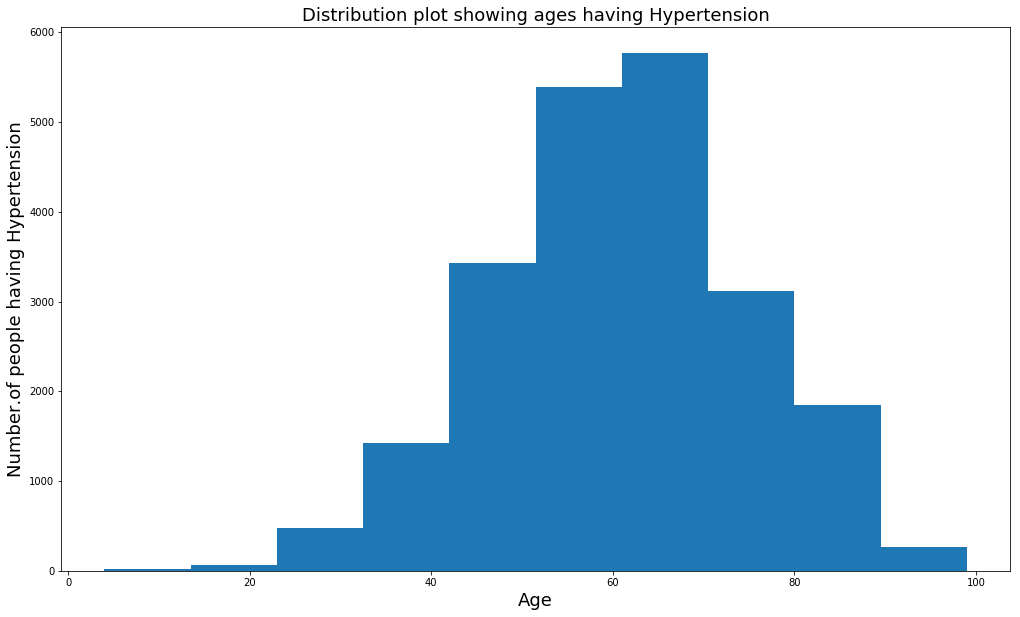

In [45]:
#Distribution plot showing ages having Hypertension
#set figuresize
plt.figure(figsize = (17,10));
df_hypertension['age'].plot(kind = 'hist')
#set ticklabels and title
plt.xlabel('Age', fontsize = 18);
plt.ylabel('Number.of people having Hypertension', fontsize = 18);
plt.title('Distribution plot showing ages having Hypertension',fontsize = 18);

Graph depicts 50 to 70 age people are most likely to have Hypertension.

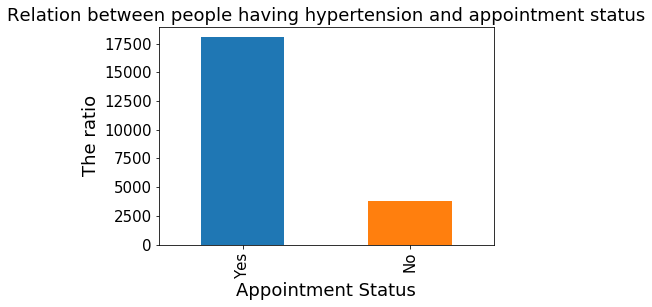

In [46]:
#The relationship between people suffering from high blood pressure and their attendance at the hospitalزززززز
df_hypertension['no_show'].value_counts().plot(kind = 'bar',fontsize = 15);
#set location and labels
x_axis = [0,1]
labels = ['Yes', 'No']
#set ticklabels and title
plt.xticks(x_axis,labels);
plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('The ratio', fontsize = 18);
plt.title('Relation between people having hypertension and appointment status', fontsize = 18);

 80% of patients having Hypertension visit to Doctor on their Scheduled appointment

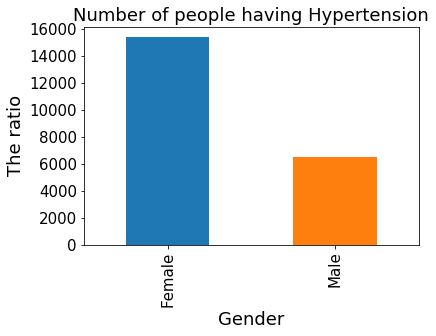

In [47]:
#Find out if it's more men or women....having Hypertension........
df[df['hypertension']==1]['gender'].value_counts().plot(kind = 'bar',fontsize = 15);
x_axis = [0,1]
labels = ['Female', 'Male']
plt.xticks(x_axis,labels);
plt.xlabel('Gender', fontsize = 18);
plt.ylabel('The ratio', fontsize = 18);
plt.title('Number of people having Hypertension', fontsize = 18);
#### Graph shows More number of females are suffering from hypertension than males

Graph shows More number of females are suffering from hypertension than males

# Research Question 7 : Characteristics of the disease diabetes

In [48]:
df.groupby('diabetes')['no_show'].value_counts(normalize = True)

diabetes  no_show
0         No         0.796389
          Yes        0.203611
1         No         0.819967
          Yes        0.180033
Name: no_show, dtype: float64

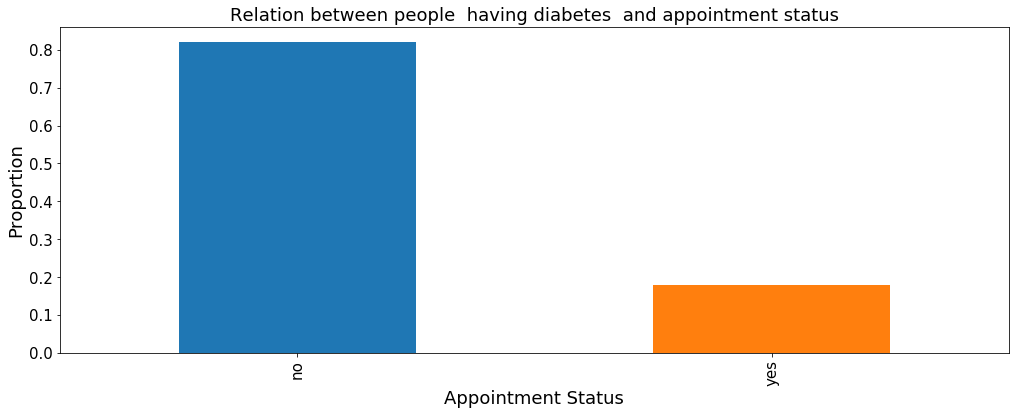

In [49]:
#set figuresize
plt.figure(figsize = (17,6));
#plot bargraph depicting rate of diabetes
df.groupby('diabetes')['no_show'].value_counts(normalize = True)[1].plot(kind = 'bar',fontsize = 15);
location = [0,1]
labels = ['no','yes']
#set xticks,labels and location
plt.xticks(location,labels);

plt.xlabel('Appointment Status', fontsize = 18);
plt.ylabel('Proportion' , fontsize = 18);
plt.title('Relation between people  having diabetes  and appointment status', fontsize = 18);

80% of patients having diabetes visit to Doctor on their Scheduled appointment

In [50]:
df.groupby('diabetes')['gender'].value_counts(normalize = True)

diabetes  gender
0         F         0.645636
          M         0.354364
1         F         0.705779
          M         0.294221
Name: gender, dtype: float64

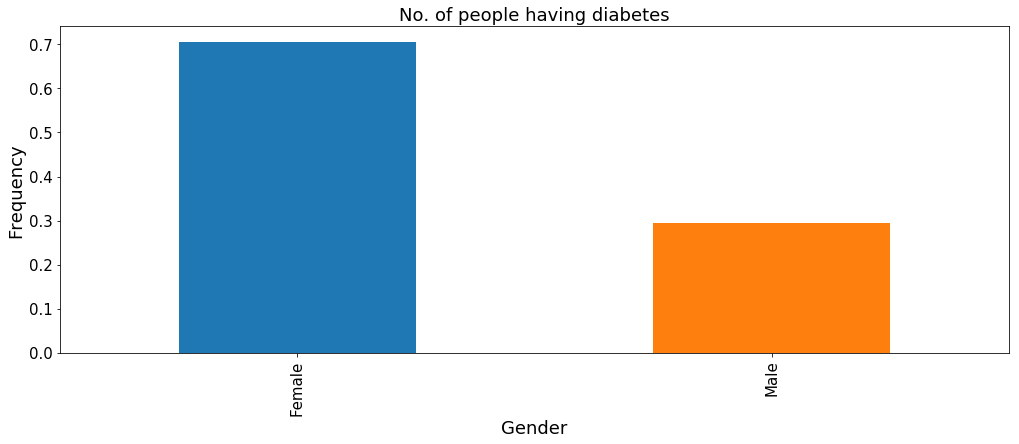

In [51]:
plt.figure(figsize = (17,6));
df.groupby('diabetes')['gender'].value_counts(normalize = True)[1].plot(kind = 'bar',fontsize = 15);
locations = [0,1]
labels = ['Female', 'Male']
plt.xticks(locations,labels);
plt.xlabel('Gender', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);
plt.title('No. of people having diabetes', fontsize = 18);

70% of Female are suffering from diabetes whereas 30% of male are suffering from diabetes

# Research Question 8 : Knowing the Proportion  of women and men in each level of handicap

In [52]:
df.groupby('handicap')['gender'].value_counts(normalize = True)

handicap  gender
0         F         0.651509
          M         0.348491
1         F         0.577527
          M         0.422473
2         F         0.573770
          M         0.426230
3         M         0.769231
          F         0.230769
4         M         0.666667
          F         0.333333
Name: gender, dtype: float64

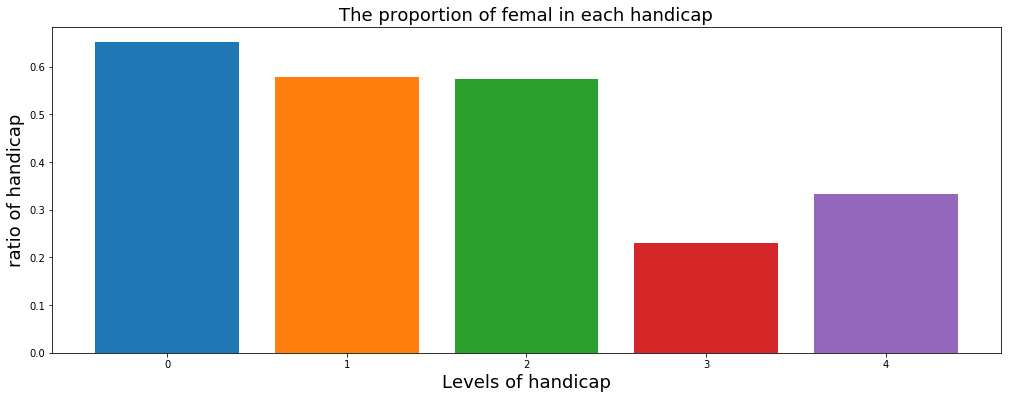

In [53]:
plt.figure(figsize =(17,6));
plt.bar(0,df.groupby('handicap')['gender'].value_counts(normalize = True)[0]['F']);
plt.bar(1,df.groupby('handicap')['gender'].value_counts(normalize = True)[1]['F']);
plt.bar(2,df.groupby('handicap')['gender'].value_counts(normalize = True)[2]['F']);
plt.bar(3,df.groupby('handicap')['gender'].value_counts(normalize = True)[3]['F']);
plt.bar(4,df.groupby('handicap')['gender'].value_counts(normalize = True)[4]['F']);
plt.xlabel('Levels of handicap',fontsize = 18);
plt.ylabel('ratio of handicap',fontsize = 18);
plt.title('The proportion of femal in each handicap',fontsize = 18);

graph show Most femal suffer of one or tow level of handicap  

Text(0.5,1,'The proportion of Man in each handicap')

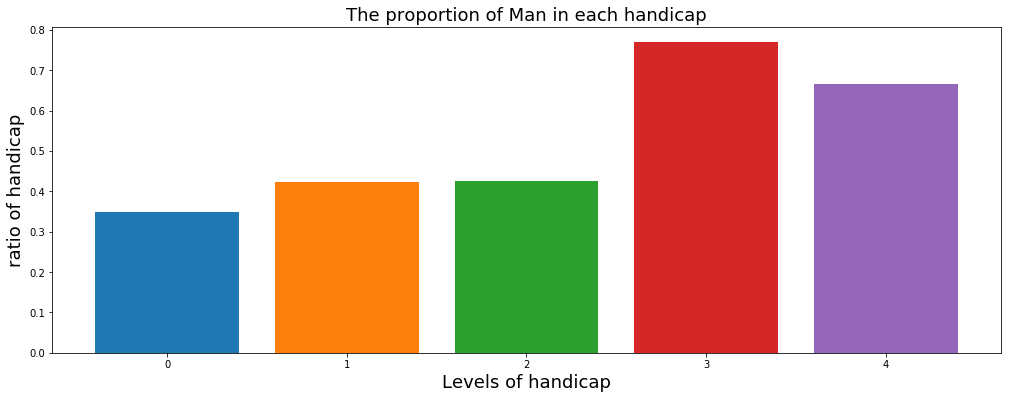

In [54]:
plt.figure(figsize =(17,6));
plt.bar(0,df.groupby('handicap')['gender'].value_counts(normalize = True)[0]['M']);
plt.bar(1,df.groupby('handicap')['gender'].value_counts(normalize = True)[1]['M']);
plt.bar(2,df.groupby('handicap')['gender'].value_counts(normalize = True)[2]['M']);
plt.bar(3,df.groupby('handicap')['gender'].value_counts(normalize = True)[3]['M']);
plt.bar(4,df.groupby('handicap')['gender'].value_counts(normalize = True)[4]['M']);
plt.xlabel('Levels of handicap',fontsize = 18);
plt.ylabel('ratio of handicap',fontsize = 18);
plt.title('The proportion of Man in each handicap',fontsize = 18)

graph show Most man suffer level three  of handicap

In [55]:
df.groupby('handicap')['no_show'].value_counts(normalize = True)

handicap  no_show
0         No         0.797643
          Yes        0.202357
1         No         0.821884
          Yes        0.178116
2         No         0.797814
          Yes        0.202186
3         No         0.769231
          Yes        0.230769
4         No         0.666667
          Yes        0.333333
Name: no_show, dtype: float64

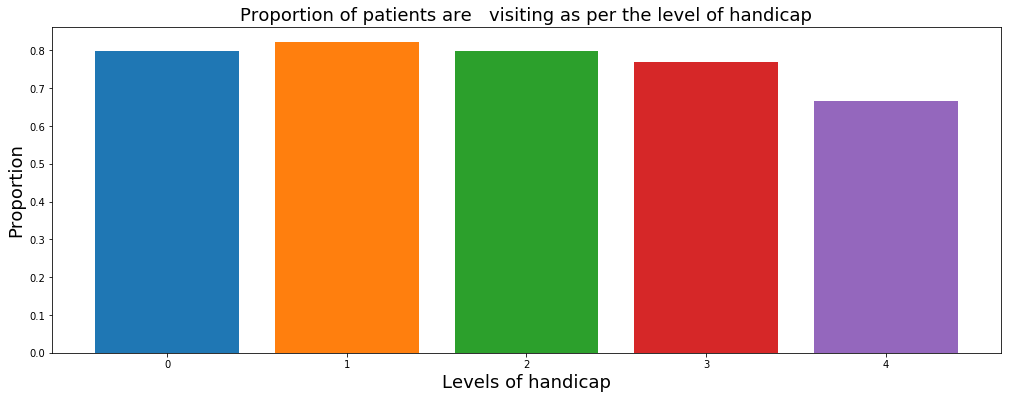

In [56]:
plt.figure(figsize =(17,6));
plt.bar(0,df.groupby('handicap')['no_show'].value_counts(normalize = True)[0]['No']);
plt.bar(1,df.groupby('handicap')['no_show'].value_counts(normalize = True)[1]['No']);
plt.bar(2,df.groupby('handicap')['no_show'].value_counts(normalize = True)[2]['No']);
plt.bar(3,df.groupby('handicap')['no_show'].value_counts(normalize = True)[3]['No']);
plt.bar(4,df.groupby('handicap')['no_show'].value_counts(normalize = True)[4]['No']);
plt.xlabel('Levels of handicap',fontsize = 18);
plt.ylabel('Proportion',fontsize = 18);
plt.title('Proportion of patients are   visiting as per the level of handicap',fontsize = 18);

 82% of the patient from Level1 visit on their scheduled appointment followed by Level0,Level2,Level3.Only 66% from level4 shows up.

# Research Question 9 : which neighborhoods have the highest number of shows / no-shows?

In [57]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [58]:
print(df.groupby('neighbourhood')['no_show'].value_counts(normalize = True).unstack("no_show")[0:5])

no_show                    No       Yes
neighbourhood                          
AEROPORTO            0.875000  0.125000
ANDORINHAS           0.770593  0.229407
ANTÔNIO HONÓRIO      0.815498  0.184502
ARIOVALDO FAVALESSA  0.780142  0.219858
BARRO VERMELHO       0.784870  0.215130


In [59]:
df_showno = df [df["no_show"]=="No"]

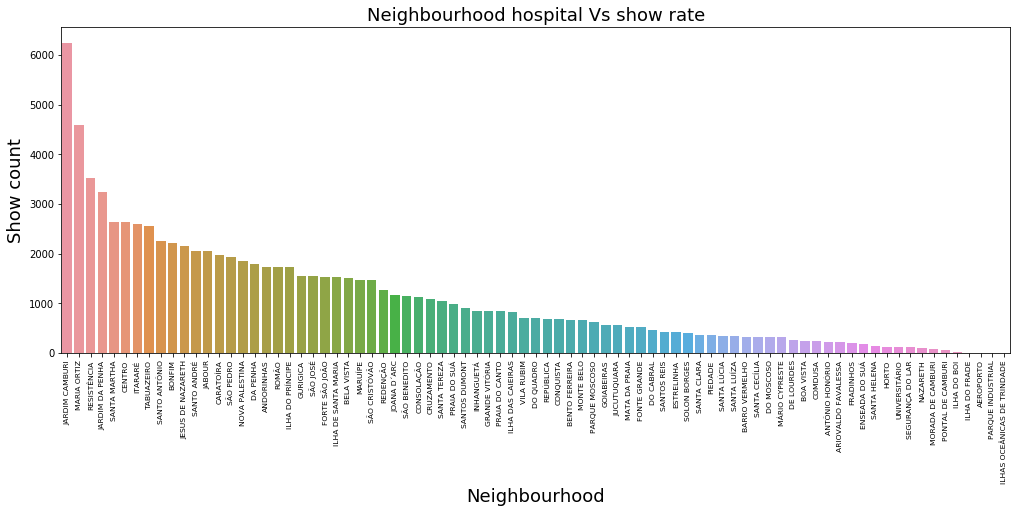

In [60]:

plt.figure(figsize = (17,6));
g=sns.countplot(x='neighbourhood',
                data=df_showno ,
                 order =df.groupby('neighbourhood')['no_show'].value_counts().unstack().sort_values(by = 'No',ascending = False).index 
                
                )
# Add title and axis labels
g.set_xticklabels(g.get_xticklabels(),rotation = 90, fontsize = 7.6);
plt.xlabel('Neighbourhood',fontsize = 18);
plt.ylabel('Show count',fontsize = 18);
plt.title('Neighbourhood hospital Vs show rate',fontsize = 18);
# Display plot
plt.show()
    

In [61]:
df_showyes =df[df['no_show']=='Yes']

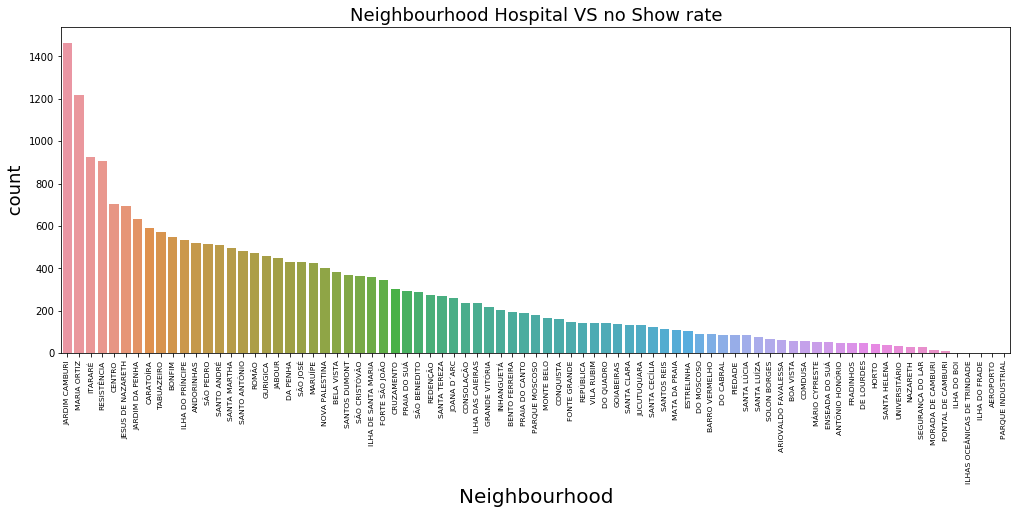

In [62]:
# Find out how many women and men are attending and who are not
plt.figure(figsize = (17,6));
g=sns.countplot(x='neighbourhood',
                data=df_showyes ,
                 order =df.groupby('neighbourhood')['no_show'].value_counts().unstack().sort_values(by = 'Yes',ascending = False).index 
                
                )
# Add title and axis labels
g.set_xticklabels(g.get_xticklabels(),rotation = 90, fontsize = 7.6);
plt.xlabel('Neighbourhood',fontsize = 20);
plt.ylabel(' count ',fontsize = 18);
plt.title('Neighbourhood Hospital VS no Show rate',fontsize = 18);
# Display plot
plt.show()

Graph depicts neighbourhood hospitals where patients aren't likely to visit

# Research Question 10 :  what are the most feature that matter the most of ( 'Scholarship'), to make the patient make it to his appiontment?

In [63]:
df.groupby('scholarship')['no_show'].value_counts(normalize = True)

scholarship  no_show
0            No         0.801947
             Yes        0.198053
1            No         0.762637
             Yes        0.237363
Name: no_show, dtype: float64

 76% of the people have scholarship  visits  the scheduled appointment.

In [64]:
print(df.groupby('scholarship').mean()[['hypertension','diabetes','alcoholism','handicap']])

             hypertension  diabetes  alcoholism  handicap
scholarship                                              
0                0.199839  0.073992    0.028417  0.022667
1                0.173465  0.052389    0.048614  0.018046


It shows irrespective of receiving scholarship people are suffering more from hypertension

# <a id='conclusions'></a>
## Conclusions
The number of women is more than the number of men , More people come on time than those who don't , It shows 80% of female comes to the scheduled appointment and 20% doesn't && It shows 80% of male comes to the scheduled appointment and 20% doesn't, As we can see in our investigation the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 37.788753472025398 , and the average age for people who are not likely to show up is 34.306820218677181 ,Graph depicts Senior people are having highest proportion of Hypertension,Diabetes followed by Middle age group and as expected child group doesnt seem to have any of the major disease except handicap, Senior people are having highest proportion of Hypertension,Diabetes followed by Middle age group and as expected child group doesnt seem to have any of the major disease except handicap, As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come , We can observe Most of the people in our data set are suffering from Hypertension, 50 to 70 age people are most likely to have Hypertension,80% of patients having Hypertension visit to Doctor on their Scheduled appointment , More number of females are suffering from hypertension than males , 80% of patients having diabetes visit to Doctor on their Scheduled appointment , 70% of Female are suffering from diabetes whereas 30% of male are suffering from diabetes , Most femal suffer of one or tow level of handicap , Most man suffer level three of handicap ,82% of the patient from Level1 visit on their scheduled appointment followed by Level0,Level2,Level3.Only 66% from level4 shows up,It shows irrespective of receiving scholarship people are suffering more from hypertension , neighbourhood is great vector of visit on their scheduled appointment .... The results of the data analysis, would appear that Female are more cautious health whereas the health of Men and Children is neglected as they may not be taking their health seriously


# Limitations:
There were outliers spotted for Age, where the min Age was -1 and the max 115.
handcap should be 0 or 1, but the max is 4.
For schedule_day column, has data only for 7 months of the year, This doesn't represent data all year.

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0